
**<center> <span style="color:#C42727;font-family:serif; font-size:34px;"> MUTUAL FUND PERFORMANCE ANALYSIS ( EDA ) 📈</span> </center>**

<center><span style="font-family:Palatino; font-size:22px;"><i>Mutual funds are like a buffet. You get to pick and choose from a variety of investments, but just like at a buffet, it's best to avoid going back for seconds too often!</i></span> </center>

# Content

1. [Introduction](#1.-Introduction)
    * [What is Mutual Fund?](#What-is-Mutual-Fund?)
    * [Objectives](#Objectives)
2. [Loading libraries and data](#2.-Loading-libraries-and-data)
3. [Understanding the data](#3.-Understanding-the-data)
4. [Statistics description](#4.-Statistics-description)
5. [Data Preprocessing](#5.Data-Preprocessing)
    * [Null value detection](#Null-value-detection)
    * [Null value treatment](#Null-value-treatment)
    * [Outlier detection](#Outlier-detection)
    * [Outlier treatment](#Outlier-treatment)
6. [Exploratory data analysis](#6.-Exploratory-data-analysis)
    * [Distribution](#Distribution)
    * [Skewness and kurtosis](#Skewness-and-kurtosis)
    * [Correlation](#Correlation)
7. [Achieving objectives](#7.-Achieving-objectives)
    * [Comparison of returns across different time periods (1 year, 3 year, 5 year)](#Metric-1-:-Comparison-of-returns-across-different-periods-(1-year,-3-years,-5-years)).
    * [Analysis of the number of funds under management by each Asset Management Company (AMC)](#Metric-2-:-Analysis-of-the-number-of-funds-under-management-by-each-Asset-Management-Company-(AMC))
    * [Comparison of returns of top performing funds across different AMC's](#Metric-3-:-Comparison-of-returns-of-top-performing-funds-across-different-AMC's)
    * [Top 3 funds with respect to categories and years](#Metric-4-:-Top-3-best-returning-funds-in-1_year,-3_year-,-5_year)
    * [Comparison of returns across different fund categories and types](#Metric-5-:-Top-3-best-returning-fund-in-categories-and-types)


<img src="DALL·E 2023-01-27 17.05.26 - mutual fund performance, Digital art.png" >

# 1. Introduction

### What is Mutual Fund?

A mutual fund is an investment vehicle that pools money from multiple investors to purchase a diverse range of securities like stocks, bonds, and other assets. It is managed by a professional fund manager and offers investors an easy way to diversify their portfolios. There are various types of mutual funds such as stock funds, bond funds, money market funds, balanced funds, index funds, specialty funds, active funds and passive funds. It is recommended to consult a financial advisor before investing in any mutual funds.

### Objectives

1. Comparison of returns across different time periods (1 year, 3 year, 5 year).

2. Analysis of the number of funds under management by each Asset Management Company (AMC)

3. Comparison of returns of top performing funds across different AMC's

4. Top 3 funds with respect to categories and years

5. Comparison of returns across different fund categories and types

# 2. Loading libraries and data

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [3]:
# Import the data
df = pd.read_csv("mutual_funds_india.csv")

# 3. Understanding the data

In [4]:
# Check the data shape 
df.shape

(1088, 9)

* 1088 rows and 9 columns - small data set

In [5]:
# Data snippet 
df.head()

,Unnamed: 0,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
0,0,Quant,Quant Small Cap Fund Direct Plan Growth,Equity,Very High Risk,4.0,9.98,54.37,22.73
1,1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
2,2,PGIM,PGIM India Midcap Opportunities Fund Direct Gr...,Equity,Very High Risk,5.0,11.02,44.22,21.49
3,3,Bank,Bank of India Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,13.16,44.13,NaN
4,4,Quant,Quant Tax Plan Direct Growth,Equity,Very High Risk,5.0,17.43,43.88,23.76


* Drop Unnamed column

In [6]:
# deleting  unwanted columns
del df['Unnamed: 0']

In [7]:
## Check the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AMC_name          1088 non-null   object 
 1   Mutual Fund Name  1088 non-null   object 
 2   category          1088 non-null   object 
 3   risk_type         1088 non-null   object 
 4   fund_rating       741 non-null    float64
 5   return_1yr        975 non-null    float64
 6   return_3yr        829 non-null    float64
 7   return_5yr        696 non-null    float64
dtypes: float64(4), object(4)
memory usage: 68.1+ KB


* Four columns having null values : Fund rating, 1yr return, 3yr return and 5yr return respectively

# 4. Statistics description

In [8]:
df.describe()

,fund_rating,return_1yr,return_3yr,return_5yr
count,741.000000,975.000000,829.000000,696.000000
mean,3.066127,4.208585,13.563679,9.541135
std,1.102675,8.208132,9.016110,4.366601
min,1.000000,-39.000000,-9.240000,-2.950000
25%,2.000000,2.155000,5.650000,6.300000
50%,3.000000,3.750000,11.750000,8.650000
75%,4.000000,5.640000,19.760000,12.790000
max,5.000000,78.290000,54.370000,28.910000


* Return 1yr have max 78.29% and -39% 
* Return 3yr col, mean > median (positive skewness), Can say there are few outperformars, And still there is a fund with -9.24% returns 
* Return 5yr col, good to see here negative is just -2%, but to consider after 5 years fund can be in negative returns

# 5. Data Preprocessing

## Null value detection

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
df

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
0,Quant,Quant Small Cap Fund Direct Plan Growth,Equity,Very High Risk,4.0,9.98,54.37,22.73
1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
2,PGIM,PGIM India Midcap Opportunities Fund Direct Gr...,Equity,Very High Risk,5.0,11.02,44.22,21.49
3,Bank,Bank of India Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,13.16,44.13,NaN
4,Quant,Quant Tax Plan Direct Growth,Equity,Very High Risk,5.0,17.43,43.88,23.76
...,...,...,...,...,...,...,...,...
1083,Sundaram,Sundaram Ultra Short Term Fund Direct Growth,Debt,Moderate Risk,3.0,3.69,NaN,NaN
1084,BNP,BNP Paribas Overnight Fund Direct Growth,Debt,Low Risk,3.0,3.25,NaN,NaN
1085,Invesco,Invesco India Overnight Fund Direct Growth,Debt,Low Risk,2.0,3.84,NaN,NaN
1086,HSBC,HSBC Ultra Short Duration Fund Direct Growth,Debt,Low to Moderate Risk,3.0,3.96,NaN,NaN


*lets have a glance into null values manually

In [11]:
pd.set_option("display.max_rows",None)
df

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
0,Quant,Quant Small Cap Fund Direct Plan Growth,Equity,Very High Risk,4.0,9.98,54.37,22.73
1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
2,PGIM,PGIM India Midcap Opportunities Fund Direct Gr...,Equity,Very High Risk,5.0,11.02,44.22,21.49
3,Bank,Bank of India Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,13.16,44.13,NaN
4,Quant,Quant Tax Plan Direct Growth,Equity,Very High Risk,5.0,17.43,43.88,23.76
5,Quant,Quant Infrastructure Fund Direct Growth,Equity,Very High Risk,5.0,25.78,43.74,23.91
6,Quant,Quant Mid Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.43,40.20,22.03
7,Quant,Quant Flexi Cap Fund Direct Growth,Equity,Very High Risk,NaN,8.31,39.82,19.71
8,Quant,Quant Active Fund Direct Growth,Equity,Very High Risk,NaN,12.41,39.22,23.40
9,Kotak,Kotak Small Cap Fund Direct Growth,Equity,Very High Risk,4.0,10.06,39.13,19.66


In [12]:
null_rows = df[df.isnull().any(axis=1)]
null_rows


,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
3,Bank,Bank of India Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,13.16,44.13,NaN
7,Quant,Quant Flexi Cap Fund Direct Growth,Equity,Very High Risk,NaN,8.31,39.82,19.71
8,Quant,Quant Active Fund Direct Growth,Equity,Very High Risk,NaN,12.41,39.22,23.40
11,Edelweiss,Edelweiss Small Cap Fund Direct Growth,Equity,Very High Risk,4.0,14.63,38.28,NaN
13,Tata,Tata Small Cap Fund Direct Growth,Equity,Very High Risk,3.0,12.87,34.46,NaN
20,Invesco,Invesco India Smallcap Fund Direct Growth,Equity,Very High Risk,3.0,6.80,32.57,NaN
24,Mirae,Mirae Asset Midcap Fund Direct Growth,Equity,Moderately High Risk,4.0,8.53,31.92,NaN
30,Tata,Tata Resources & Energy Fund Direct Growth,Equity,Very High Risk,NaN,-0.25,30.78,15.60
31,Motilal,Motilal Oswal Nasdaq 100 FOF Direct Growth,Other,Very High Risk,NaN,13.70,30.44,NaN


<AxesSubplot: >

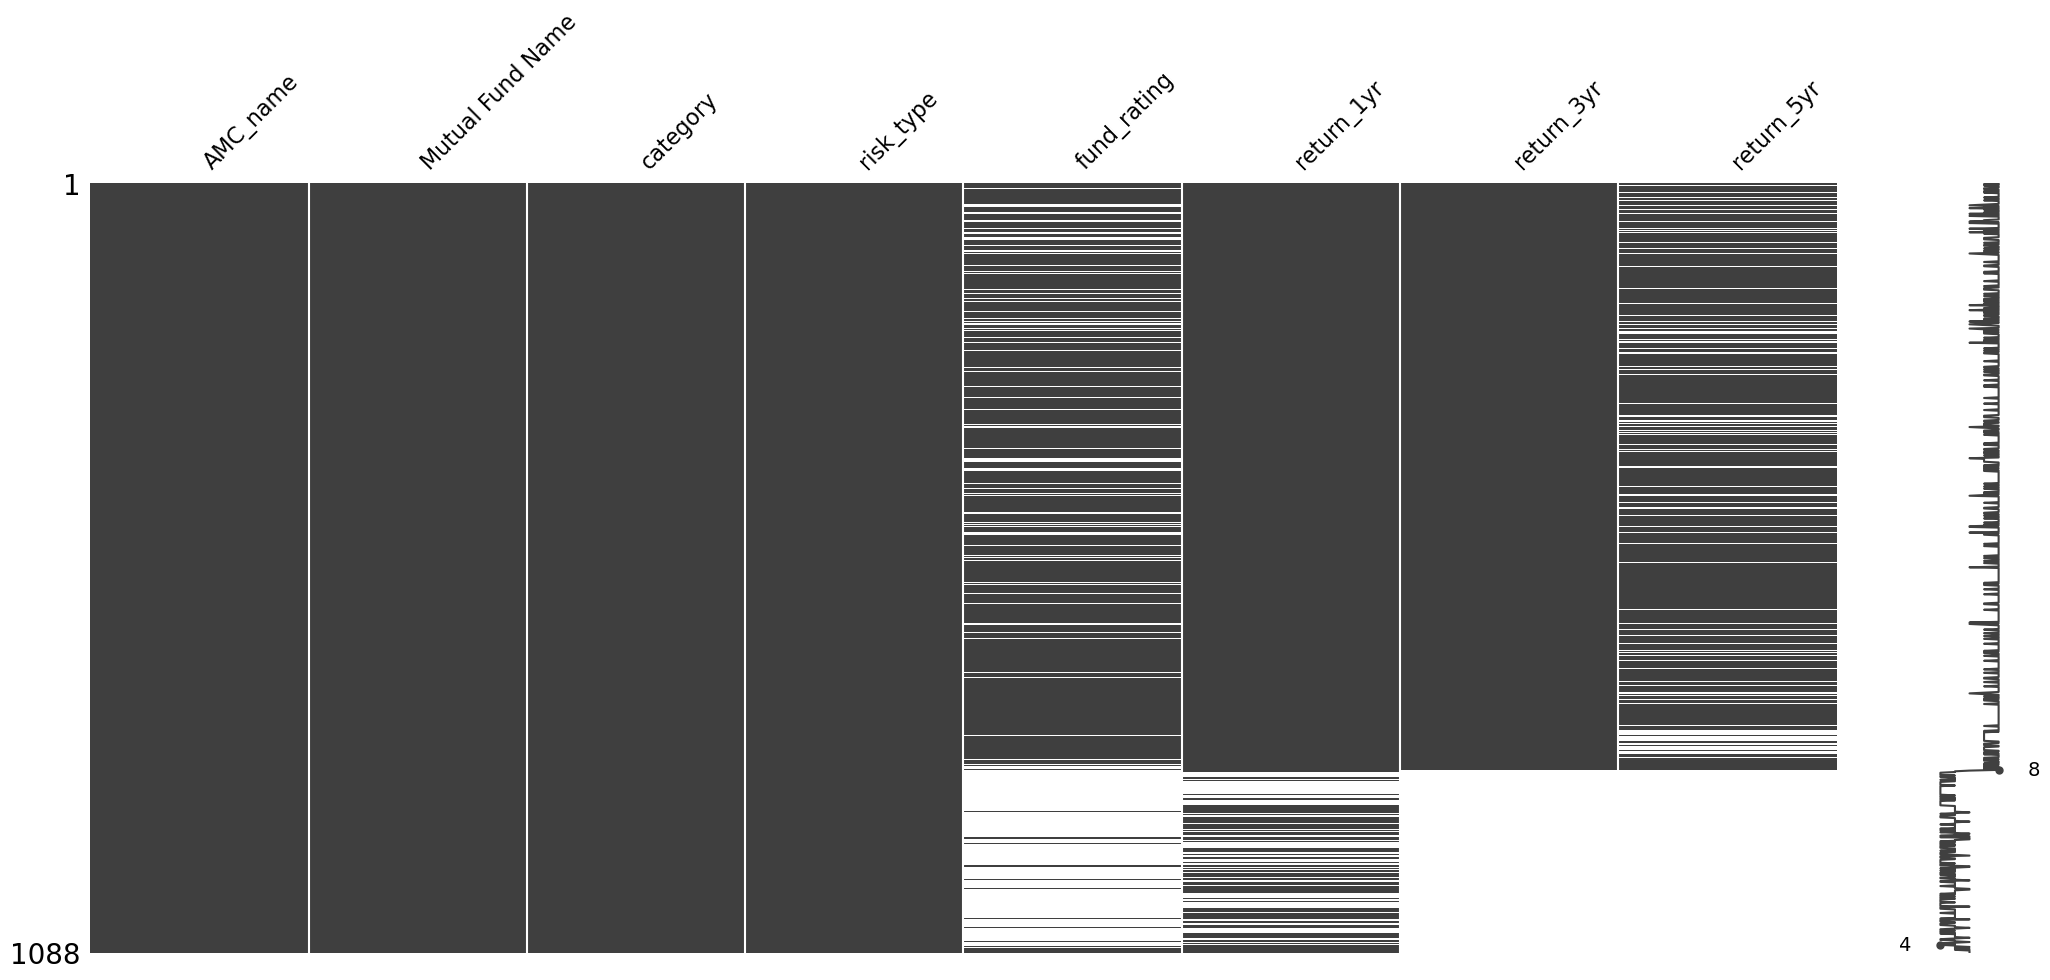

In [13]:
#Visualize missing values as a matrix
msno.matrix(df)

* we can see there are 4 four columns with null

## Null value treatment

## Lets deal with Null values in 2 steps

* Step one : Null values present in important columns(return_1yr,return_3yr,return_5yr)
* Step two : Null values present in fund_rating

## Step one : Deep dive into 3 columns

In [14]:
df[(df['return_1yr'].isnull()) & ((df['return_3yr'].isnull()) | (df['return_5yr'].isnull()))]
  
    


,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
832,IDFC,IDFC Midcap Fund Direct Growth,Equity,Very High Risk,NaN,NaN,NaN,NaN
833,Canara,Canara Robeco Banking and PSU Debt Fund Direct...,Debt,Low to Moderate Risk,NaN,NaN,NaN,NaN
834,Nippon,Nippon India Nifty Alpha Low Volatility 30 Ind...,Other,Very High Risk,NaN,NaN,NaN,NaN
835,Navi,Navi Nifty India Manufacturing Index Fund Dire...,Other,Very High Risk,NaN,NaN,NaN,NaN
837,TRUSTMF,TRUSTMF Money Market Fund Direct Growth,Debt,Low to Moderate Risk,NaN,NaN,NaN,NaN
838,HDFC,HDFC NIFTY Next 50 Index Fund Direct Growth,Other,Very High Risk,NaN,NaN,NaN,NaN
842,SBI,SBI Balanced Advantage Fund Direct Growth,Hybrid,Moderately High Risk,NaN,NaN,NaN,NaN
845,Motilal,Motilal Oswal S&P BSE Quality Index Fund Direc...,Other,Very High Risk,NaN,NaN,NaN,NaN
846,IDFC,IDFC Nifty200 Momentum 30 Index Fund Direct Gr...,Other,Very High Risk,NaN,NaN,NaN,NaN
847,Quant,Quant Large Cap Fund Direct Growth,Equity,Very High Risk,NaN,NaN,NaN,NaN


*lmao, There are some funds with three important cols null(return_1yr,return_3yr,return_5yr), Lets drop those funds

In [15]:
df.drop(df[(df['return_1yr'].isnull()) & ((df['return_3yr'].isnull()) | (df['return_5yr'].isnull()))].index,inplace=True)

<AxesSubplot: >

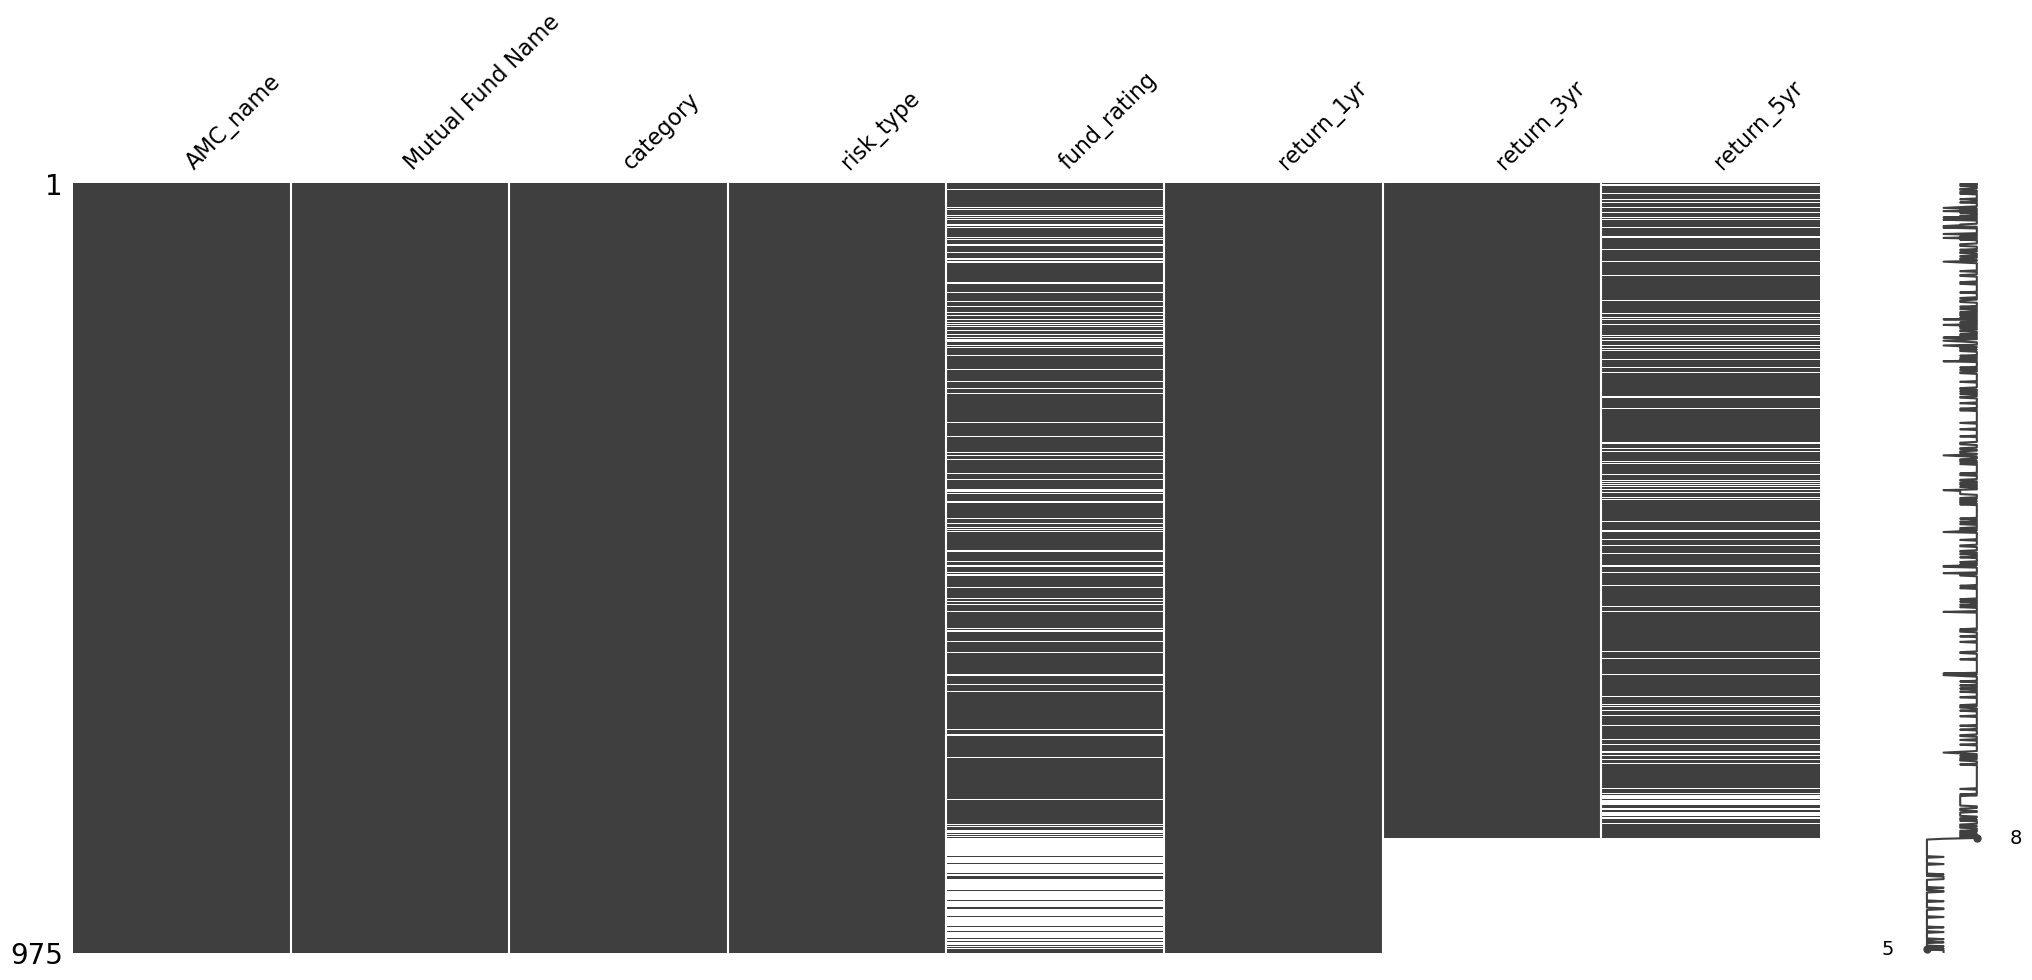

In [16]:
#lets check again
msno.matrix(df)

* Rows are reduced to 975 from 1088  

* Clearly we can see in visulization there are missing value in col return_3yr and return_5yr but in return_1yr
* Means, Funds came into market in recent years, they were not present before 5 years, this says missing values are not missing values, they never existed, So we cant fill nor we delete this funds

* Most important 

* Lets check, if return_5yr col is not null, mean the fund came into market before 5 year and then for that fund if there are missing values in 3 year and 1 year col then this values are true missing values
* Similarly, Lets check, if return_3yr col is not null, mean the fund came into market before 3 year and then for that fund if there are missing values in 1 year col then this values are true missing values

In [17]:
df[(df['return_5yr'].notnull()) & ((df['return_3yr'].isnull()) | (df['return_1yr'].isnull()))]

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr


In [18]:
df[(df['return_3yr'].notnull()) & ((df['return_1yr'].isnull()))]

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr


* AWESOME, Our assumption is true, there is not even a single fund with missing values, means those null values are not missing values but they never existed
* So according to our problem statement, Its idel to not to treat "Never existed values"

## Step two : Deep dive into fund_rating columns

In [12]:
def null_percentage(df, column):
    null_count = df[column].isnull().sum()
    total_count = df[column].count()
    return 100 * (null_count / total_count)

null_percentage(df, "fund_rating")

NameError: name 'df' is not defined

* Here i dont want to drop, Because its 31% 
* Mean,median and mode is not effective method 
* Neither forwardfill and backwordfill

## Outlier detection


Here we are using z-score method to find out outliers, since we are dealing with numerical0 data column's

In [20]:
# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

cols = df.select_dtypes(include=[np.number]).columns


for col in cols:
    z = np.abs(stats.zscore(df[col]))
    outliers = np.where(z > 3)
    outliers_count[col] = len(outliers[0])

print(outliers_count)


{'fund_rating': 0, 'return_1yr': 22, 'return_3yr': 0, 'return_5yr': 0}


Detected :

    * 1 Year Returns : 27
    * 3 Year Returns : 1
    * 5 Year Returns : 3

## Outlier treatment

An outlier will weaken the correlation making the data more scattered so r gets closer to 0. Therefore, we need to remove the outlier.

In [21]:
outliers_data = {}
for col in cols:
    z = np.abs(stats.zscore(df[col]))
    outliers = np.where(z > 3)
    outliers_data[col] = df.iloc[outliers[0]]

print(outliers_data)


{'fund_rating': Empty DataFrame
Columns: [AMC_name, Mutual Fund Name, category, risk_type, fund_rating, return_1yr, return_3yr, return_5yr]
Index: [], 'return_1yr':        AMC_name                                   Mutual Fund Name category  \
87          UTI  UTI Transportation and Logistics Fund Direct G...   Equity   
132   Principal     Principal Emerging Bluechip Fund Direct Growth   Equity   
312    Sundaram          Sundaram Equity Hybrid Fund Direct Growth   Hybrid   
313    Sundaram     Sundaram Diversified Equity Fund Direct Growth   Equity   
340    Sundaram  Sundaram Smart NIFTY 100 Equal Weight Fund Dir...    Other   
389      Aditya  Aditya Birla Sun Life Commodity Equities Fund ...   Equity   
436        PGIM  PGIM India Global Equity Opportunities Fund Di...    Other   
441         UTI  UTI Focussed Equity Fund Series VI (1150 Days)...   Equity   
495   Edelweiss  Edelweiss Greater China Equity Off shore Fund ...    Other   
604   Principal             Principal Large C

* Lets check those outliers manually for each column, Because need to inspect whether outlier is 1500% of returns ( or ) 50% of returns.

In [30]:
outliers_df = df.loc[np.abs(stats.zscore(df['return_1yr'])) > 3]
print(outliers_df)

       AMC_name                                   Mutual Fund Name category  \
87          UTI  UTI Transportation and Logistics Fund Direct G...   Equity   
132   Principal     Principal Emerging Bluechip Fund Direct Growth   Equity   
312    Sundaram          Sundaram Equity Hybrid Fund Direct Growth   Hybrid   
313    Sundaram     Sundaram Diversified Equity Fund Direct Growth   Equity   
340    Sundaram  Sundaram Smart NIFTY 100 Equal Weight Fund Dir...    Other   
389      Aditya  Aditya Birla Sun Life Commodity Equities Fund ...   Equity   
436        PGIM  PGIM India Global Equity Opportunities Fund Di...    Other   
441         UTI  UTI Focussed Equity Fund Series VI (1150 Days)...   Equity   
495   Edelweiss  Edelweiss Greater China Equity Off shore Fund ...    Other   
566        HSBC    HSBC Global Emerging Markets Direct Plan Growth    Other   
604   Principal             Principal Large Cap Fund Direct Growth   Equity   
815      Nippon       Nippon India Japan Equity Fund

FOUND INTRESTING INSIGHTS :
    
    *Using Z-score with threshold : 3, returns from col(return_1yr), -23% and 30% returns are considered as outlier
    * We know mutual fund returns range between : (-50% to 50%)
    * So it not ideal to remove outliers with (z-score threshold : 3)
    * IF we doing outlier tretment to this values, we potenially miss out best performer and worst performer 
    * ignore outlier tretment for((z-score threshold : 3))

In [31]:
#Change the threshold
outliers_df = df.loc[np.abs(stats.zscore(df['return_1yr'])) > 5]
print(outliers_df)

       AMC_name                                   Mutual Fund Name category  \
441         UTI  UTI Focussed Equity Fund Series VI (1150 Days)...   Equity   
824        PGIM  PGIM India Emerging Markets Equity Fund Direct...    Other   
910   Principal                Principal Midcap Fund Direct Growth   Equity   
965   Principal             Principal Small Cap Fund Direct Growth   Equity   
1052    Invesco  Invesco India Invesco Global Consumer Trends F...    Other   

                 risk_type  fund_rating  return_1yr  return_3yr  return_5yr  
441         Very High Risk          NaN   45.249245        10.5         NaN  
824         Very High Risk          NaN  -36.832076        -3.1       -0.46  
910   Moderately High Risk          NaN   45.249245         NaN         NaN  
965   Moderately High Risk          3.0   45.249245         NaN         NaN  
1052        Very High Risk          NaN  -36.832076         NaN         NaN  


* This values something like 78% returns and 63% returns can create noise, so lets do outlier treatment - Capping

In [24]:
#capping 
# Set the upper and lower limits for capping
upper_limit = df['return_1yr'].mean() + 5*df['return_1yr'].std()
lower_limit = df['return_1yr'].mean() - 5*df['return_1yr'].std()

# Replace the outliers with the upper/lower limit
df['return_1yr'] = df['return_1yr'].apply(lambda x: upper_limit if x > upper_limit else x)
df['return_1yr'] = df['return_1yr'].apply(lambda x: lower_limit if x < lower_limit else x)

In [25]:
outliers_df3 = df.loc[np.abs(stats.zscore(df['return_3yr'])) > 3]
print(outliers_df3)

Empty DataFrame
Columns: [AMC_name, Mutual Fund Name, category, risk_type, fund_rating, return_1yr, return_3yr, return_5yr]
Index: []


* Here for 3 year return column, Ignore outlier treatment

In [26]:
outliers_df5 = df.loc[np.abs(stats.zscore(df['return_5yr'])) > 3]
print(outliers_df5)

Empty DataFrame
Columns: [AMC_name, Mutual Fund Name, category, risk_type, fund_rating, return_1yr, return_3yr, return_5yr]
Index: []


* Similarly, Here for 5 year return column, Ignore outlier treatment

# 6. Exploratory data analysis 

## Distribution graph 

Distribution plot of  fund_rating  column
Distribution plot of  return_1yr  column
Distribution plot of  return_3yr  column
Distribution plot of  return_5yr  column


<Figure size 640x480 with 0 Axes>

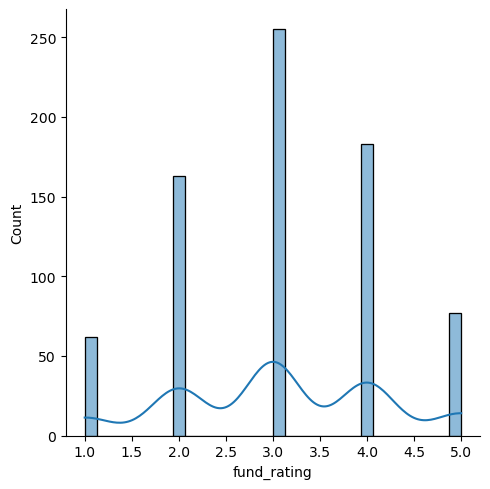

<Figure size 640x480 with 0 Axes>

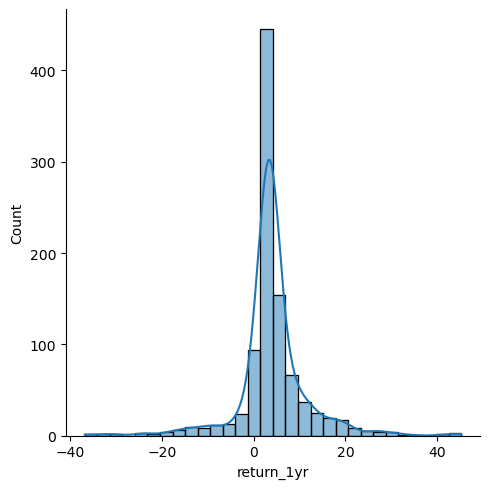

<Figure size 640x480 with 0 Axes>

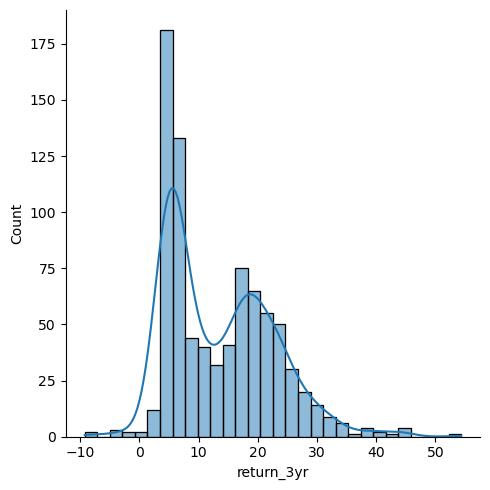

<Figure size 640x480 with 0 Axes>

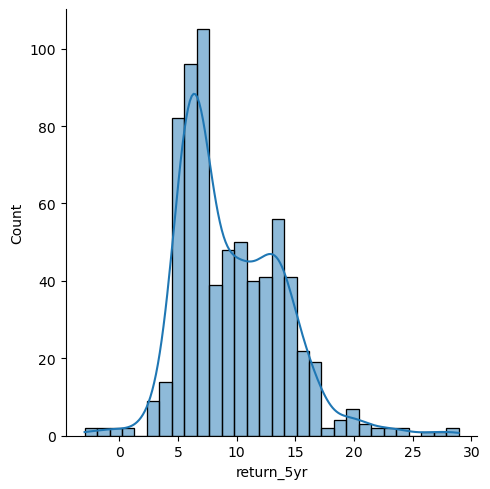

In [27]:
# Check the distribution of the data
cols = df.select_dtypes(include=[np.number]).columns
for col in cols:
    plt.figure()
    sns.displot(df[col], kde=True, bins = 30)
    print("Distribution plot of ",col," column")

* There is normal distribution on rating col, max on 3.0 followed by 4.0,2.0,5.0,1.0
* OMG we can see -40% returns in return_1year, Most of them fall in range of 0% to 5%
* here we can see after 3 years(return_3yr), max return reach is 40%(crazy) which are two or three,And finally majority of funds lieing beteen 5% to 20%(AT 5% to 6% = 300 counts and around 20% = 200 counts)
* And finally in return_5yr column there is one peak at 8% at count 110 and remaining majority lies between 5% to 15%  

Overall, these insights suggest that the majority of the mutual funds in the dataset have good returns over the long-term (3 and 5 years respectively), with a larger proportion of funds having negative returns in the first year 

* Drop doing anlysis for first cloumn - Because its not a safe option to invest in mutul fund, If planning to hold for 1 year ( According to this dataset)

### Skewness and kurtosis

In [48]:
# Check Skewness and Kurtosis
skew = df.skew(numeric_only = True)
kurt = df.kurt(numeric_only = True)

print("Skewness: \n",skew)
print("Kurtosis: \n",kurt)

Skewness: 
 fund_rating   -0.042885
return_1yr     0.085491
return_3yr     0.729851
return_5yr     0.840277
dtype: float64
Kurtosis: 
 fund_rating   -0.653273
return_1yr     7.952965
return_3yr     0.319576
return_5yr     1.291035
dtype: float64


SKEWNESS and Krutosis
* In this case, we can see that the Skewness of returns, return_3yr and return_5yr is negative(0.729 and 0.840), since positive value is to less,Therefore, we can infer that both return_3yr and return_5yr columns have a relatively symmetric distribution with a slight right skew, meaning that there are slightly more positive returns than negative returns in that columns.
* Same goes with return_1yr


Final inference : 

* The return_3yr and return_5yr columns have a relatively symmetric distribution with a slight right skew and are flatter than a normal distribution.
* The fund_rating platykurtic which means they are flatter than a normal distribution.

### Correlation

Heatmap of Correlation matrix


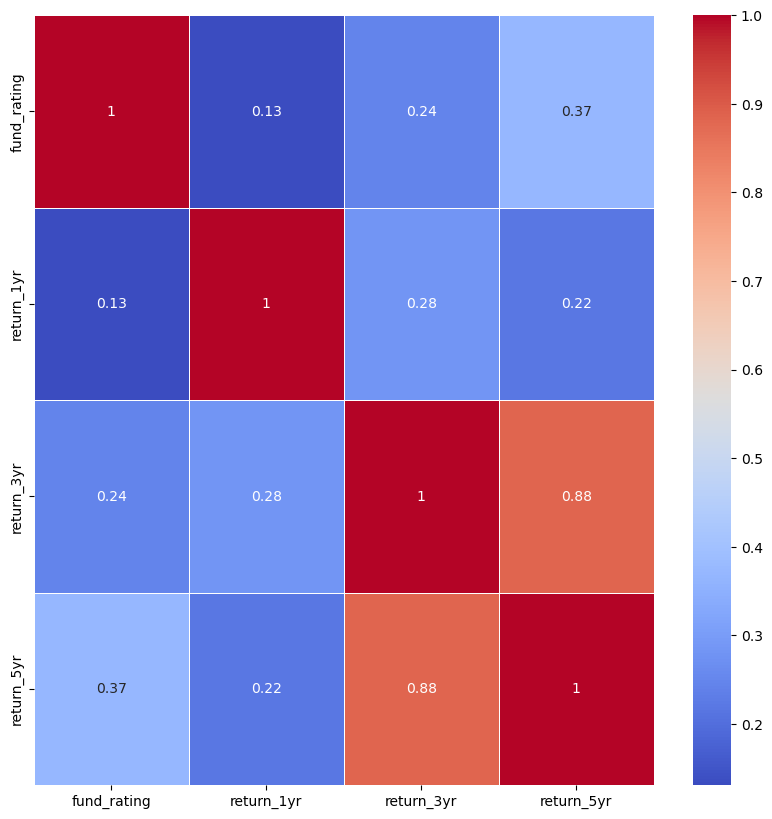

In [28]:
# Check the correlation of the data
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, linewidths=.5, cmap='coolwarm')
print("Heatmap of Correlation matrix")

 * This suggests that the performance of a mutual fund over different time periods is consistent with each other. The positive correlation between returns for different time periods implies that if the fund performed well over the last 1 year, it is likely to perform well over the next 3 years or 5 years as well. This information can be useful for investors as it gives an idea of how consistent the performance of a fund is over different time periods. Additionally, it can also be used by fund managers to identify patterns in the performance of their funds over different time periods and make adjustments accordingly.

Pairplot of all columns


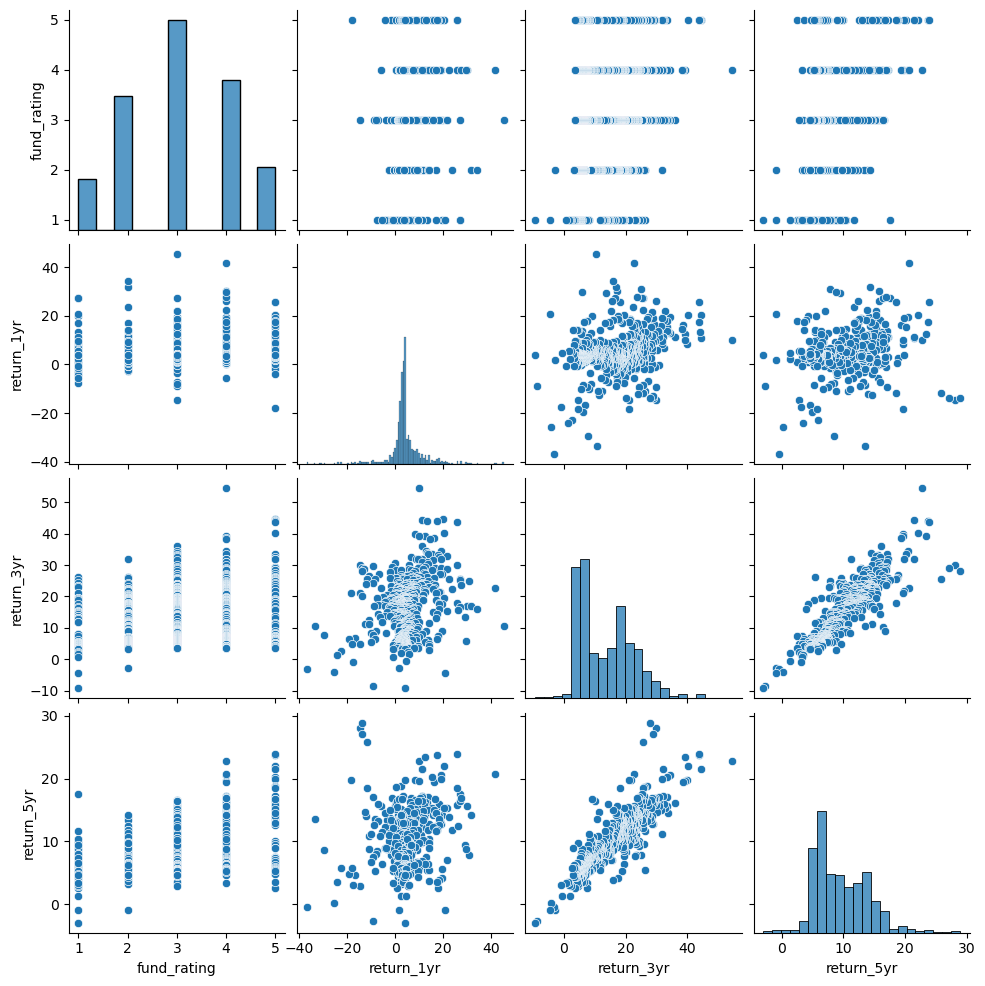

In [29]:
# Check the pair plot of the data
sns.pairplot(df)
print("Pairplot of all columns")

### Metric 1 : Comparison of returns across different periods (1 year, 3 years, 5 years) 

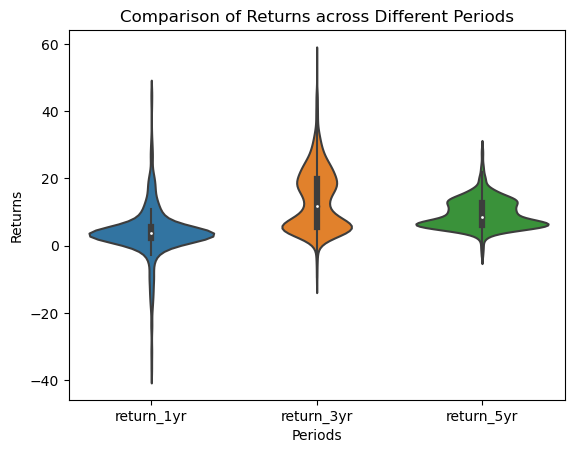

In [30]:
 
returns_df = df[['return_1yr', 'return_3yr', 'return_5yr']]

sns.violinplot(data=returns_df)

plt.xlabel('Periods')
plt.ylabel('Returns')
plt.title('Comparison of Returns across Different Periods')
plt.show()



* From violin graph we can infer that even after 3yr and 5yr there some good number of funds giving negative returns, Be very must cautions while investing

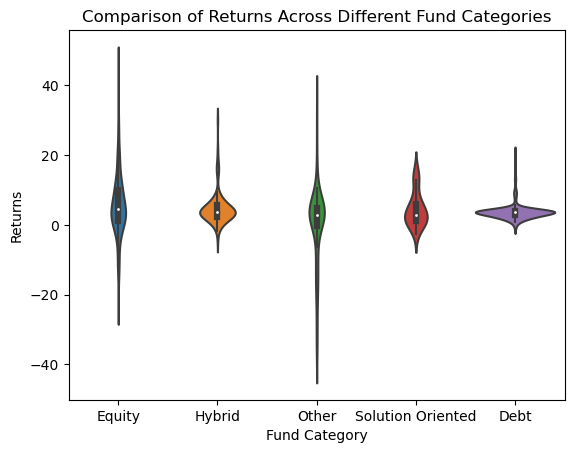

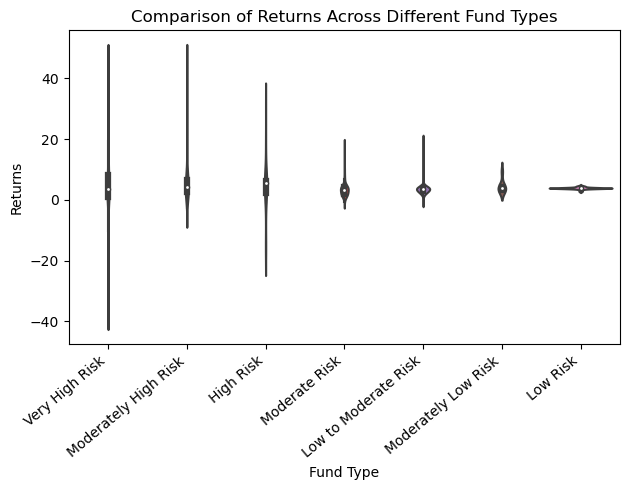

In [31]:
#comparision of returns across different fund categories and types 
# create a violin plot to compare returns across different categories
sns.violinplot(x='category', y='return_1yr', data=df)
plt.xlabel('Fund Category')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Categories')
plt.show()

# create a violin plot to compare returns across different types
vt = sns.violinplot(x='risk_type', y='return_1yr', data=df)
vt.set_xticklabels(vt.get_xticklabels(),rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Fund Type')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Types')
plt.show()


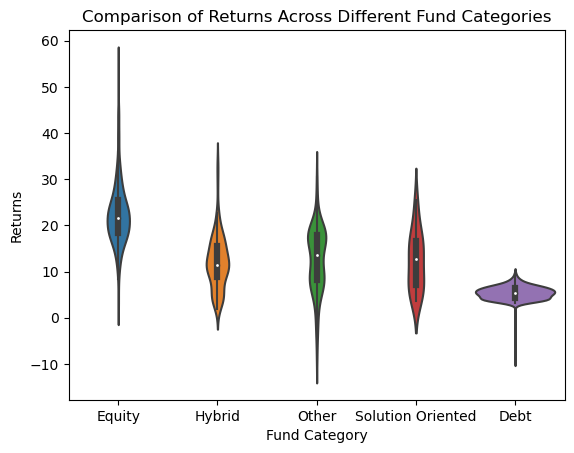

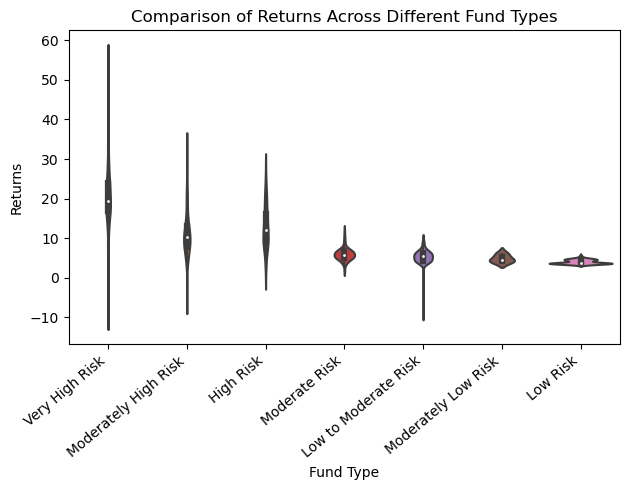

In [32]:
sns.violinplot(x='category', y='return_3yr', data=df)
plt.xlabel('Fund Category')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Categories')
plt.show()

# create a box plot to compare returns across different types
vt = sns.violinplot(x='risk_type', y='return_3yr', data=df)
vt.set_xticklabels(vt.get_xticklabels(),rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Fund Type')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Types')
plt.show()


* surprsingly there are more number of negative return funds then positive returns in other funds( I guess this are theamed funds), We can also see that debt funds never going to give returns higher than 10% - FIG 1
                                                                                                                               

* we can clearly see that picking modearte low risk and even low risk, does not safe guard you from having a negative returns,    This is surprising moderate low risk funds performed worst - FIG 2

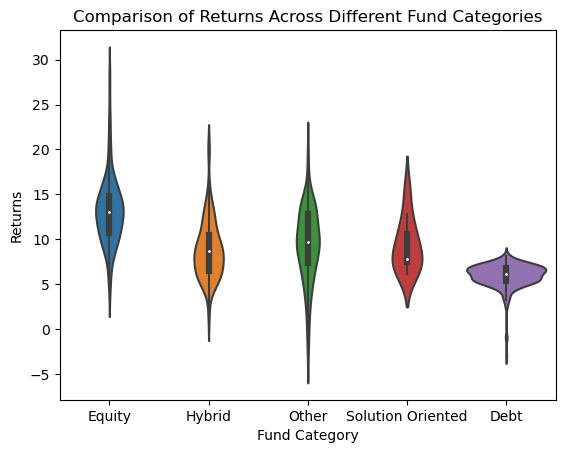

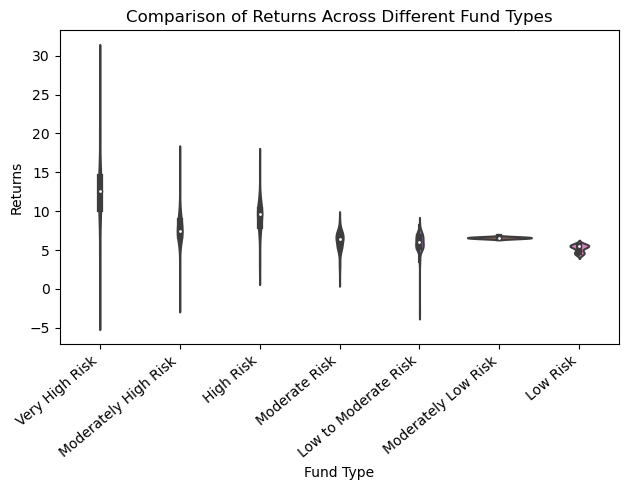

In [33]:
sns.violinplot(x='category', y='return_5yr', data=df)
plt.xlabel('Fund Category')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Categories')
plt.show()

# create a box plot to compare returns across different types
vt = sns.violinplot(x='risk_type', y='return_5yr', data=df)
vt.set_xticklabels(vt.get_xticklabels(),rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Fund Type')
plt.ylabel('Returns')
plt.title('Comparison of Returns Across Different Fund Types')
plt.show()


* we can infer that its best go for mutul fund(if plan is for 5+ years),Expect other category fund, most of them are at positive bracket of returns 
* debt funds are not giving any great returns after 5 years aswell, Better to drop we plan is for long period 
* wow median of equity funds stands at 11% better than hybrid fund which stand at 8% - FIG 1

* we can clearly see that picking modearte low risk and even low risk, does not safe guard you from having a negative returns,This is surprising moderate low risk funds performed worst, there is no change after 2 years also.
* low risk funds = Moderate risk funds
* All three Very high risk, moderate high risk and high risk, giving negative returns, Then its better to pick equity fund( having good median value-10%) - FIG 2

<Figure size 10000x6000 with 0 Axes>

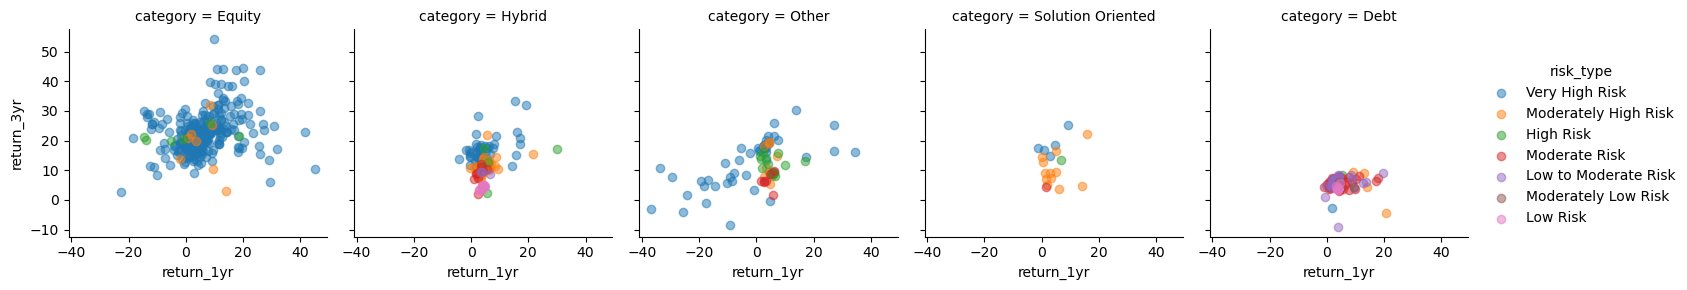

<Figure size 10000x6000 with 0 Axes>

In [34]:
g = sns.FacetGrid(df, col='category', hue='risk_type')
g.map(plt.scatter, 'return_1yr','return_3yr', alpha=.5)
g.add_legend()
plt.figure(figsize=(100,60))


<Figure size 10000x6000 with 0 Axes>

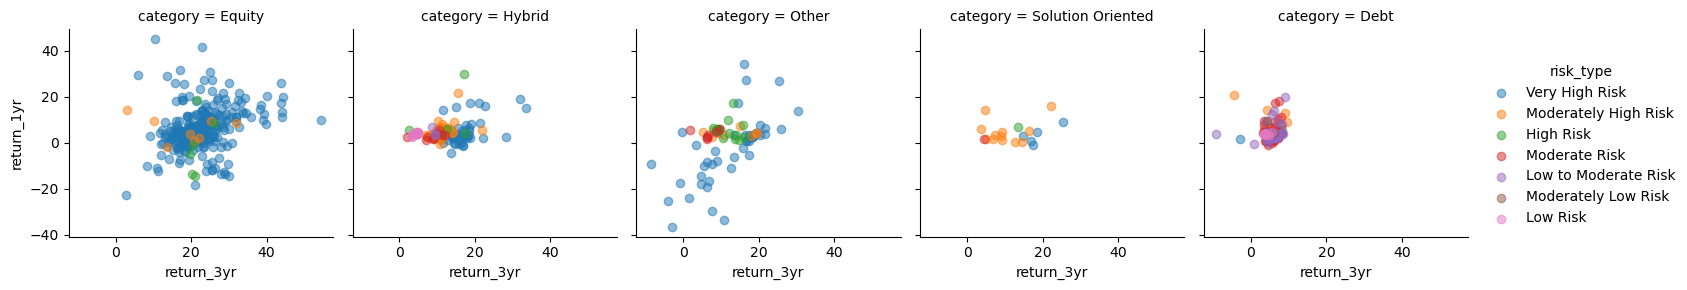

<Figure size 10000x6000 with 0 Axes>

In [35]:
h = sns.FacetGrid(df, col='category', hue='risk_type')
h.map(plt.scatter, 'return_3yr','return_1yr',alpha=.5)
h.add_legend()
plt.figure(figsize=(100,60))

### Metric 2 : Analysis of the number of funds under management by each Asset Management Company (AMC)

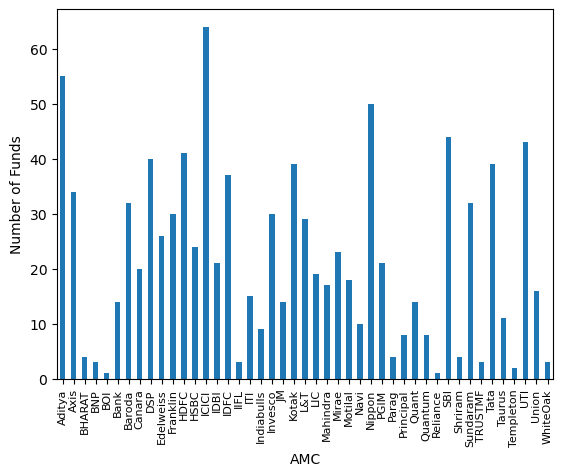

In [36]:
#analysis of number of funds under managment by each AMC

amc_funds = df.groupby('AMC_name')['Mutual Fund Name'].count()

amc_funds.plot(kind='bar', xlabel='AMC', ylabel='Number of Funds')
plt.xticks(rotation=90, fontsize=8)


plt.show()


* ICICI have highest no of funds followed by ADITYA and NIPPON

### Metric 3 : Comparison of returns of top performing funds across different AMC's

In [46]:
df_top_performing_funds_1yr = df.loc[df.groupby("AMC_name")["return_1yr"].idxmax()]
df_top_performing_funds_1yr_sorted = df_top_performing_funds_1yr.sort_values(by='return_1yr', ascending=False)

df_top_performing_funds_1yr_sorted

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
910,Principal,Principal Midcap Fund Direct Growth,Equity,Moderately High Risk,NaN,45.249245,NaN,NaN
441,UTI,UTI Focussed Equity Fund Series VI (1150 Days)...,Equity,Very High Risk,NaN,45.249245,10.50,NaN
907,Sundaram,Sundaram Equity Fund Direct Growth,Equity,Very High Risk,NaN,41.420000,NaN,NaN
389,Aditya,Aditya Birla Sun Life Commodity Equities Fund ...,Equity,Very High Risk,NaN,29.210000,13.59,9.45
113,Baroda,Baroda Midcap Direct Fund Growth,Equity,Very High Risk,4.0,27.490000,23.56,16.94
75,SBI,SBI Consumption Opportunities Fund Direct Growth,Equity,Very High Risk,3.0,27.140000,25.65,16.34
328,ICICI,ICICI Prudential BHARAT 22 FOF Direct Growth,Other,Very High Risk,1.0,27.140000,16.53,NaN
34,Motilal,Motilal Oswal Midcap Fund Direct Growth,Equity,Very High Risk,4.0,25.920000,29.98,15.77
5,Quant,Quant Infrastructure Fund Direct Growth,Equity,Very High Risk,5.0,25.780000,43.74,23.91
144,HDFC,HDFC Focused 30 Fund Direct Plan Growth,Equity,Very High Risk,2.0,23.540000,22.50,11.72


In [47]:
df_top_performing_funds_1yr_sorted.nlargest(5,'return_1yr')

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
910,Principal,Principal Midcap Fund Direct Growth,Equity,Moderately High Risk,NaN,45.249245,NaN,NaN
441,UTI,UTI Focussed Equity Fund Series VI (1150 Days)...,Equity,Very High Risk,NaN,45.249245,10.50,NaN
907,Sundaram,Sundaram Equity Fund Direct Growth,Equity,Very High Risk,NaN,41.420000,NaN,NaN
389,Aditya,Aditya Birla Sun Life Commodity Equities Fund ...,Equity,Very High Risk,NaN,29.210000,13.59,9.45
113,Baroda,Baroda Midcap Direct Fund Growth,Equity,Very High Risk,4.0,27.490000,23.56,16.94


### Metric 4 : Top 3 best returning funds in 1_year, 3_year , 5_year

In [38]:
# Find the top 3 best returning funds in 1 year
top_return_1yr = df.nlargest(3, 'return_1yr')[['AMC_name','Mutual Fund Name','return_1yr']]
print("Top 3 best returning funds in 1 year:")
print(top_return_1yr)

Top 3 best returning funds in 1 year:
      AMC_name                                   Mutual Fund Name  return_1yr
441        UTI  UTI Focussed Equity Fund Series VI (1150 Days)...   45.249245
910  Principal                Principal Midcap Fund Direct Growth   45.249245
965  Principal             Principal Small Cap Fund Direct Growth   45.249245


In [39]:
# Find the top 3 best returning funds in 3 year
top_return_3yr = df.nlargest(3, 'return_3yr')[['AMC_name','Mutual Fund Name','return_3yr']]
print("Top 3 best returning funds in 3 year:")
print(top_return_3yr)

Top 3 best returning funds in 3 year:
  AMC_name                                   Mutual Fund Name  return_3yr
0    Quant            Quant Small Cap Fund Direct Plan Growth       54.37
1   Canara         Canara Robeco Small Cap Fund Direct Growth       44.48
2     PGIM  PGIM India Midcap Opportunities Fund Direct Gr...       44.22


In [40]:
# Find the top 3 best returning funds in 5 year
top_return_5yr = df.nlargest(3, 'return_5yr')[['AMC_name','Mutual Fund Name','return_5yr']]
print("Top 3 best returning funds in 5 year:")
print(top_return_5yr)

Top 3 best returning funds in 5 year:
   AMC_name                                   Mutual Fund Name  return_5yr
52     Tata              Tata Digital India Fund Direct Growth       28.91
33    ICICI     ICICI Prudential Technology Direct Plan Growth       28.00
41   Aditya  Aditya Birla Sun Life Digital India Fund Direc...       27.02


In [41]:
grouped_data = df.groupby('category')

top_1yr_funds = []
top_3yr_funds = []
top_5yr_funds = []


for name, group in grouped_data:
    top_1yr_funds.append(group.nlargest(3, 'return_1yr'))
    top_3yr_funds.append(group.nlargest(3, 'return_3yr'))
    top_5yr_funds.append(group.nlargest(3, 'return_5yr'))

# top 3 
print("Top 3 best returning funds in each category for 1 year:")
print(top_1yr_funds)

print("Top 3 best returning funds in each category for 3 year:")
print(top_3yr_funds)

print("Top 3 best returning funds in each category for 5 year:")
print(top_5yr_funds)



Top 3 best returning funds in each category for 1 year:
[    AMC_name                                   Mutual Fund Name category  \
826      UTI                 UTI Credit Risk Fund Direct Growth     Debt   
465      UTI                UTI Dynamic Bond Fund Direct Growth     Debt   
502     Bank  Bank of India Short Term Income Fund Direct Gr...     Debt   

                risk_type  fund_rating  return_1yr  return_3yr  return_5yr  
826  Moderately High Risk          1.0       20.76       -4.37       -0.98  
465  Low to Moderate Risk          NaN       19.71        9.10        5.57  
502         Moderate Risk          5.0       17.97        7.40        2.54  ,       AMC_name                                   Mutual Fund Name category  \
441        UTI  UTI Focussed Equity Fund Series VI (1150 Days)...   Equity   
910  Principal                Principal Midcap Fund Direct Growth   Equity   
965  Principal             Principal Small Cap Fund Direct Growth   Equity   

                

### Metric 5 : Top 3 best returning fund in categories and types

In [42]:
top_1yr_funds_df = pd.concat(top_1yr_funds)
top_1yr_funds_df

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
826,UTI,UTI Credit Risk Fund Direct Growth,Debt,Moderately High Risk,1.0,20.760000,-4.37,-0.98
465,UTI,UTI Dynamic Bond Fund Direct Growth,Debt,Low to Moderate Risk,NaN,19.710000,9.10,5.57
502,Bank,Bank of India Short Term Income Fund Direct Gr...,Debt,Moderate Risk,5.0,17.970000,7.40,2.54
441,UTI,UTI Focussed Equity Fund Series VI (1150 Days)...,Equity,Very High Risk,NaN,45.249245,10.50,NaN
910,Principal,Principal Midcap Fund Direct Growth,Equity,Moderately High Risk,NaN,45.249245,NaN,NaN
965,Principal,Principal Small Cap Fund Direct Growth,Equity,Moderately High Risk,3.0,45.249245,NaN,NaN
312,Sundaram,Sundaram Equity Hybrid Fund Direct Growth,Hybrid,High Risk,4.0,30.110000,17.11,15.70
354,Bank,Bank of India Conservative Hybrid Fund Direct ...,Hybrid,Moderately High Risk,3.0,21.730000,15.41,7.02
25,Quant,Quant Multi Asset Fund Direct Growth,Hybrid,Very High Risk,5.0,19.050000,31.87,19.85
340,Sundaram,Sundaram Smart NIFTY 100 Equal Weight Fund Dir...,Other,Very High Risk,2.0,34.350000,16.08,NaN


In [43]:
top_3yr_funds_df = pd.concat(top_3yr_funds)
top_3yr_funds_df

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
451,HDFC,HDFC Fixed Maturity Plan 1141 Days August 2018...,Debt,Moderately High Risk,3.0,9.19,9.52,NaN
465,UTI,UTI Dynamic Bond Fund Direct Growth,Debt,Low to Moderate Risk,NaN,19.71,9.10,5.57
471,Baroda,Baroda BNP Paribas Credit Risk Fund Direct Growth,Debt,Moderately High Risk,5.0,12.81,8.94,7.46
0,Quant,Quant Small Cap Fund Direct Plan Growth,Equity,Very High Risk,4.0,9.98,54.37,22.73
1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
2,PGIM,PGIM India Midcap Opportunities Fund Direct Gr...,Equity,Very High Risk,5.0,11.02,44.22,21.49
16,Quant,Quant Absolute Fund Direct Growth,Hybrid,Very High Risk,5.0,15.25,33.46,20.17
25,Quant,Quant Multi Asset Fund Direct Growth,Hybrid,Very High Risk,5.0,19.05,31.87,19.85
50,Bank,Bank of India Mid & Small Cap Equity & Debt Fu...,Hybrid,Very High Risk,4.0,2.45,28.28,13.46
31,Motilal,Motilal Oswal Nasdaq 100 FOF Direct Growth,Other,Very High Risk,NaN,13.70,30.44,NaN


In [45]:
top_5yr_funds_df = pd.concat(top_5yr_funds)
top_5yr_funds_df

,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
635,IDFC,IDFC Government Securities Fund Constant Matur...,Debt,Moderate Risk,NaN,-0.13,5.53,8.15
483,ICICI,ICICI Prudential Credit Risk Fund Direct Plan ...,Debt,High Risk,4.0,5.40,8.28,8.06
524,Edelweiss,Edelweiss Government Securities Fund Direct Gr...,Debt,Moderate Risk,4.0,2.21,6.90,8.01
52,Tata,Tata Digital India Fund Direct Growth,Equity,Very High Risk,NaN,-13.64,27.94,28.91
33,ICICI,ICICI Prudential Technology Direct Plan Growth,Equity,Very High Risk,NaN,-14.60,29.99,28.00
41,Aditya,Aditya Birla Sun Life Digital India Fund Direc...,Equity,Very High Risk,NaN,-13.63,29.00,27.02
16,Quant,Quant Absolute Fund Direct Growth,Hybrid,Very High Risk,5.0,15.25,33.46,20.17
25,Quant,Quant Multi Asset Fund Direct Growth,Hybrid,Very High Risk,5.0,19.05,31.87,19.85
312,Sundaram,Sundaram Equity Hybrid Fund Direct Growth,Hybrid,High Risk,4.0,30.11,17.11,15.70
167,Franklin,Franklin India Feeder Franklin US Opportunitie...,Other,Very High Risk,NaN,3.96,21.63,19.74


### Thank you for exploring this notebook. I hope you found it insightful and informative.Wish you all the best in your future Kaggling endeavors!